# Tunability Importance of Hyperparameters of ML Algorithms

## Importing Required Libraries

In [102]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint, uniform
import xgboost
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from skopt.space import Integer, Real

## Loading Datasets

In [6]:
data_fitness = pd.read_csv("../data/fitness_dataset.csv")
data_heart = pd.read_csv("../data/heart.csv")
data_ecommerce = pd.read_csv("../data/ecommerce.csv")
data_placement = pd.read_csv("../data/placementdata.csv")
data_insurance = pd.read_csv("../data/TravelInsurancePrediction.csv")
data_churn = pd.read_csv("../data/Churn_Modelling.csv")


In [8]:
data_fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB


In [9]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
data_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [11]:
data_placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [12]:
data_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [13]:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Data preparation, cleaning, transformations, and pipeline definition


In [14]:
y_fitness = data_fitness.loc[:, 'is_fit']
X_fitness = data_fitness.drop(['is_fit'], axis = 1)
y_heart = data_heart.loc[:,'HeartDisease']
X_heart = data_heart.drop(['HeartDisease'], axis = 1)
y_ecommerce = data_ecommerce.loc[:,'Reached.on.Time_Y.N']
X_ecommerce = data_ecommerce.drop(['Reached.on.Time_Y.N'], axis = 1)
y_placement = data_placement.loc[:,'PlacementStatus']
X_placement = data_placement.drop(['PlacementStatus'], axis = 1)
y_insurance = data_insurance.loc[:,'TravelInsurance']
X_insurance = data_insurance.drop(['TravelInsurance'], axis = 1)
y_churn = data_churn.loc[:,'Exited']
X_churn = data_churn.drop(['Exited'], axis = 1)

In [15]:
X_fitness['smokes'] = X_fitness['smokes'].replace({'yes':1, 'no':0}).astype(int)

In [16]:
X_ecommerce = X_ecommerce.drop(['ID'], axis = 1)
X_ecommerce['Gender'] = X_ecommerce['Gender'].replace({'M':1, 'F':0}).astype(int)

C:\Users\zuzan\AppData\Local\Temp\ipykernel_17436\2984316737.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_ecommerce['Gender'] = X_ecommerce['Gender'].replace({'M':1, 'F':0}).astype(int)


In [17]:
X_placement = X_placement.drop(['StudentID'], axis = 1)
X_placement['ExtracurricularActivities'] = X_placement['ExtracurricularActivities'].replace({'Yes':1, 'No':0}).astype(int)
X_placement['PlacementTraining'] = X_placement['PlacementTraining'].replace({'Yes':1, 'No':0}).astype(int)
y_placement = y_placement.replace({'Placed':1, 'NotPlaced':0}).astype(int)

C:\Users\zuzan\AppData\Local\Temp\ipykernel_17436\1500601370.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_placement['ExtracurricularActivities'] = X_placement['ExtracurricularActivities'].replace({'Yes':1, 'No':0}).astype(int)
C:\Users\zuzan\AppData\Local\Temp\ipykernel_17436\1500601370.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_placement['PlacementTraining'] = X_placement['PlacementTraining'].replace({'Yes':1, 'No':0}).astype(int)
C:\Users\zuzan\AppData\Local\Temp\ipykernel_17436\1500601370.py:4: FutureWarning

In [18]:
X_insurance = X_insurance.drop(['Unnamed: 0'], axis = 1)
X_insurance['GraduateOrNot'] = X_insurance['GraduateOrNot'].replace({'Yes':1, 'No':0}).astype(int)
X_insurance['FrequentFlyer'] = X_insurance['FrequentFlyer'].replace({'Yes':1, 'No':0}).astype(int)
X_insurance['EverTravelledAbroad'] = X_insurance['EverTravelledAbroad'].replace({'Yes':1, 'No':0}).astype(int)


C:\Users\zuzan\AppData\Local\Temp\ipykernel_17436\1569246524.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_insurance['GraduateOrNot'] = X_insurance['GraduateOrNot'].replace({'Yes':1, 'No':0}).astype(int)
C:\Users\zuzan\AppData\Local\Temp\ipykernel_17436\1569246524.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_insurance['FrequentFlyer'] = X_insurance['FrequentFlyer'].replace({'Yes':1, 'No':0}).astype(int)
C:\Users\zuzan\AppData\Local\Temp\ipykernel_17436\1569246524.py:4: FutureWarning: Downcasting behavior in `repla

In [19]:
X_churn = X_churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
X_churn['Gender'] = X_churn['Gender'].replace({'Female':1, 'Male':0}).astype(int)

C:\Users\zuzan\AppData\Local\Temp\ipykernel_17436\3355471563.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_churn['Gender'] = X_churn['Gender'].replace({'Female':1, 'Male':0}).astype(int)


In [20]:
cat_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))
])

In [21]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer()),
    ('scale', MinMaxScaler())
])

In [22]:
col_transformer = ColumnTransformer(transformers=[
    ('num-pipeline',num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat-pipeline',cat_pipeline, make_column_selector(dtype_include=np.object_))
])

In [23]:
model_pipeline = Pipeline(steps=[
    ('preprocessing', col_transformer),
    ('model', RandomForestClassifier())
])

## Cross-validation on multiple datasets

In [24]:
cross_validate(model_pipeline, X_heart, y_heart)

{'fit_time': array([0.27762747, 0.21212506, 0.29607034, 0.58068895, 0.23776579]),
 'score_time': array([0.03674221, 0.        , 0.04335356, 0.03194928, 0.01165318]),
 'test_score': array([0.86956522, 0.82608696, 0.8423913 , 0.84153005, 0.76502732])}

In [25]:
cross_validate(model_pipeline, X_fitness, y_fitness)

{'fit_time': array([0.57096863, 0.48322082, 0.37250447, 0.37340832, 0.38709569]),
 'score_time': array([0.01702261, 0.03368473, 0.00630736, 0.02879524, 0.01690459]),
 'test_score': array([0.7825, 0.7625, 0.7525, 0.7725, 0.785 ])}

In [26]:
cross_validate(model_pipeline, X_ecommerce, y_ecommerce)

{'fit_time': array([1.64184284, 3.4069953 , 1.78062415, 1.41327977, 1.30156469]),
 'score_time': array([0.04827523, 0.09334183, 0.10340428, 0.16761017, 0.05707502]),
 'test_score': array([0.79      , 0.78863636, 0.58681818, 0.42545455, 0.42837653])}

In [27]:
cross_validate(model_pipeline, X_placement, y_placement)

{'fit_time': array([1.10273218, 2.38799334, 2.00108242, 1.01623726, 0.96058702]),
 'score_time': array([0.17216682, 0.06610632, 0.08051181, 0.0516634 , 0.0510025 ]),
 'test_score': array([0.775 , 0.7835, 0.793 , 0.788 , 0.7935])}

In [28]:
cross_validate(model_pipeline, X_insurance, y_insurance)

{'fit_time': array([0.35651588, 0.26912332, 0.2232182 , 0.62438679, 0.27789259]),
 'score_time': array([0.02303004, 0.01569724, 0.01620269, 0.04969501, 0.03233004]),
 'test_score': array([0.7638191 , 0.8040201 , 0.80100756, 0.76574307, 0.78085642])}

In [29]:
cross_validate(model_pipeline, X_churn, y_churn)

{'fit_time': array([2.0125742 , 3.36841226, 2.17405343, 1.34385943, 1.14340305]),
 'score_time': array([0.06291986, 0.04294038, 0.14313221, 0.04193521, 0.0396173 ]),
 'test_score': array([0.8635, 0.872 , 0.86  , 0.8655, 0.8555])}

## Analyze and visualize model performance

In [30]:
X = [X_fitness, X_heart, X_placement, X_insurance, X_churn]
y = [y_fitness, y_heart, y_placement, y_insurance, y_churn]

In [72]:
def roc_auc_difference(param_cols, results, results_mean):
    best_params = results_mean.iloc[0][param_cols]
    mask_best = (results[param_cols] == best_params.values).all(axis=1)
    best_rows = results[mask_best].copy()
    merged = results.merge(
        best_rows[['dataset', 'mean_test_score']],
        on='dataset',
        suffixes=('', '_best')
    )
    merged['score_diff'] = merged['mean_test_score_best'] - merged['mean_test_score']
    return merged

In [73]:
def plot_roc_auc_difference(merged):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=merged, x='dataset', y='score_diff', color='lightblue')

    plt.title('ROC AUC difference')
    plt.xlabel('Dataset')
    plt.ylabel('Difference')
    plt.tight_layout()
    plt.show()

In [74]:
def plot_iteration_scores(results):
    results = results.copy()
    results['iteration'] = results.groupby('dataset').cumcount() + 1
    results['cummax'] = results.groupby('dataset')['mean_test_score'].cummax()
    
    plt.figure(figsize=(8, 6))
    
    for dataset, df_sub in results.groupby('dataset'):
        plt.plot(df_sub['iteration'], df_sub['cummax'], label=dataset, linewidth=2)
    
    plt.title('Best score for the iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Cummulative ROC AUC')
    plt.legend(title='Dataset', loc='center left', bbox_to_anchor=(1.02, 0.5))
    
    plt.xlim(left=1, right=results['iteration'].max())
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## RandomSearch

### Define hyperparameters for tuning

In [75]:
param_dtc = {
    "model__max_depth": randint(1, 30),
    "model__min_samples_split": randint(2, 20),
    "model__min_samples_leaf": randint(1, 10),
    "model__max_features": uniform(0.1, 0.9),
}

param_rf = {
    "model__n_estimators": randint(100, 2000),
    "model__max_depth": randint(5, 30),
    "model__min_samples_leaf": randint(1, 10),
    "model__max_features": uniform(0.1, 0.9),
}

param_xgb = {
    "model__n_estimators": randint(100, 5000),
    "model__learning_rate": uniform(0.01, 0.3),
    "model__max_depth": randint(1, 15),
    "model__subsample": uniform(0.1, 0.9),
}

### Decision Tree

In [76]:
results_list = []

model_pipeline.set_params(model=DecisionTreeClassifier())

for i, (Xi, yi) in enumerate(zip(X, y)):
    search = RandomizedSearchCV(
        model_pipeline,
        param_distributions=param_dtc,
        n_iter=50,
        scoring='roc_auc',
        cv=5,
        random_state=123,
        n_jobs=-1
    )

    search.fit(Xi, yi)

    df = pd.DataFrame(search.cv_results_)
    df['dataset'] = i
    results_list.append(df)

results_dtc = pd.concat(results_list, ignore_index=True)

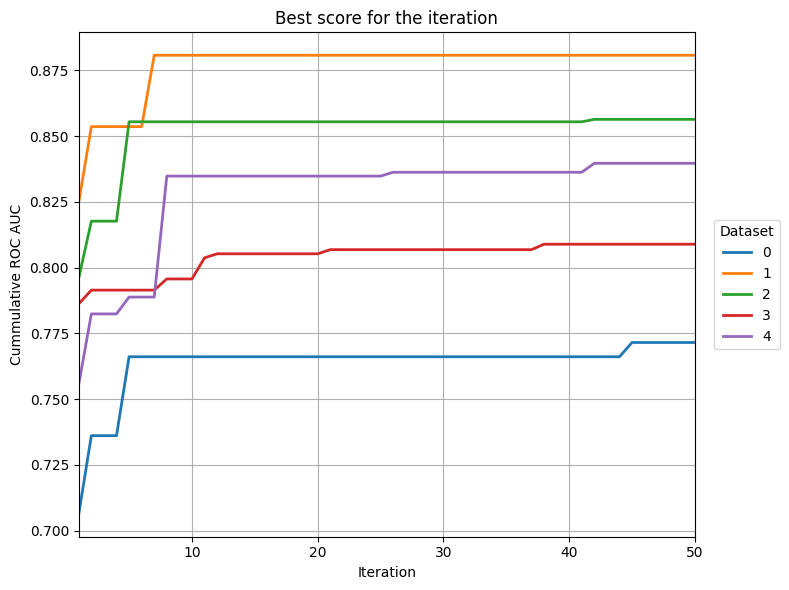

In [36]:
plot_iteration_scores(results_dtc)

In [77]:
param_cols_dtc = [c for c in results_dtc.columns if c.startswith('param_')]
results_mean_dtc = results_dtc.groupby(param_cols_dtc)['mean_test_score'].mean().reset_index().sort_values('mean_test_score', ascending=False).reset_index(drop=True)
results_mean_dtc.head()

,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,mean_test_score
0,6,0.993352,6,19,0.821436
1,7,0.389783,2,9,0.817412
2,6,0.835601,3,7,0.815626
3,5,0.443361,4,4,0.814916
4,9,0.556484,9,15,0.812121


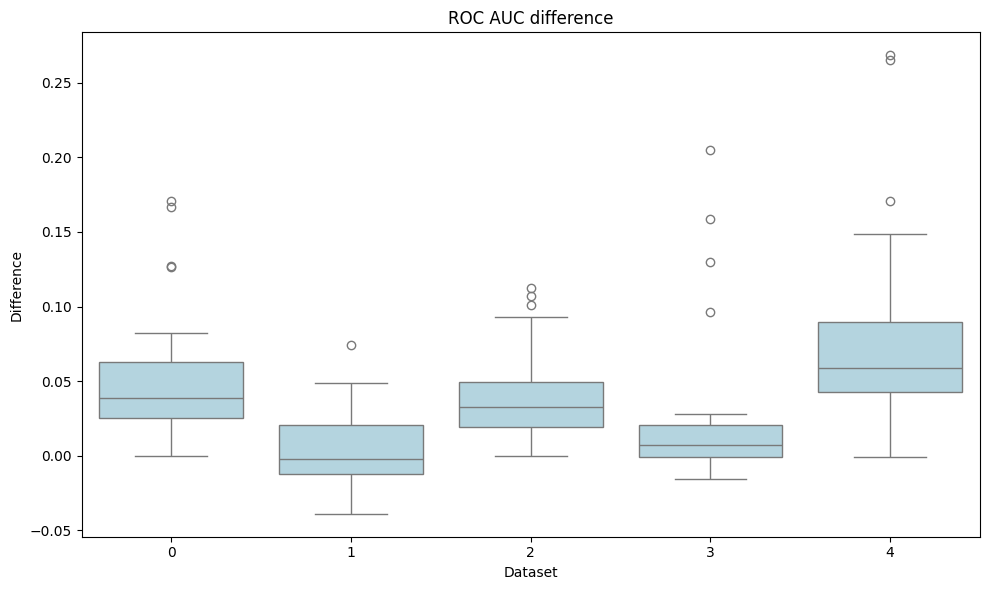

In [38]:
results_merged_dtc = roc_auc_difference(param_cols_dtc, results_dtc, results_mean_dtc)
plot_roc_auc_difference(results_merged_dtc)

### Random Forest

In [39]:
results_list = []

model_pipeline.set_params(model=RandomForestClassifier())

for i, (Xi, yi) in enumerate(zip(X, y)):
    search = RandomizedSearchCV(
        model_pipeline,
        param_distributions=param_rf,
        n_iter=20,
        scoring='roc_auc',
        cv=5,
        random_state=123,
        n_jobs=-1
    )

    search.fit(Xi, yi)

    df = pd.DataFrame(search.cv_results_)
    df['dataset'] = i
    results_list.append(df)

results_rf = pd.concat(results_list, ignore_index=True)

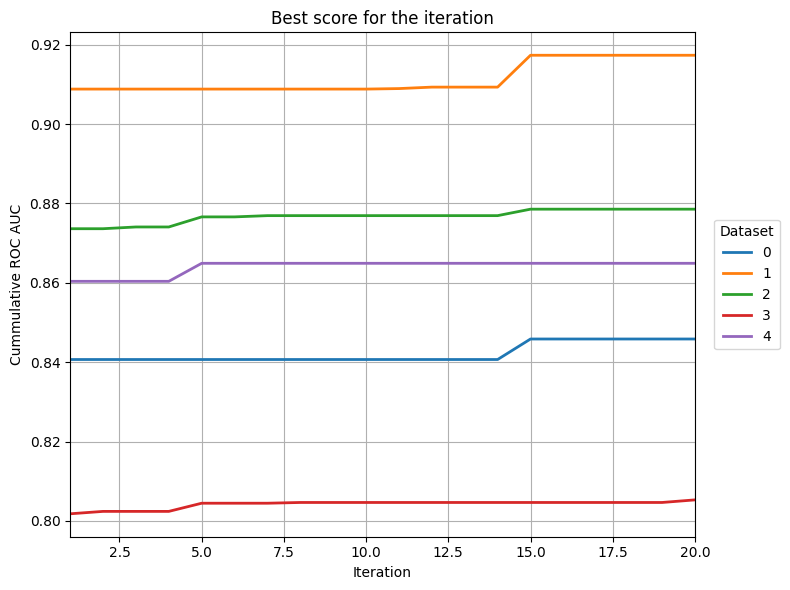

In [40]:
plot_iteration_scores(results_rf)

In [78]:
param_cols_rf = [c for c in results_rf.columns if c.startswith('param_')]
results_mean_rf = results_rf.groupby(param_cols_rf)['mean_test_score'].mean().reset_index().sort_values('mean_test_score', ascending=False).reset_index(drop=True)
results_mean_rf.head()

,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__n_estimators,mean_test_score
0,12,0.198036,6,795,0.859840
1,9,0.458240,5,1941,0.858203
2,23,0.381035,5,1706,0.857663
3,26,0.408487,9,442,0.857620
4,16,0.487776,7,1841,0.857239


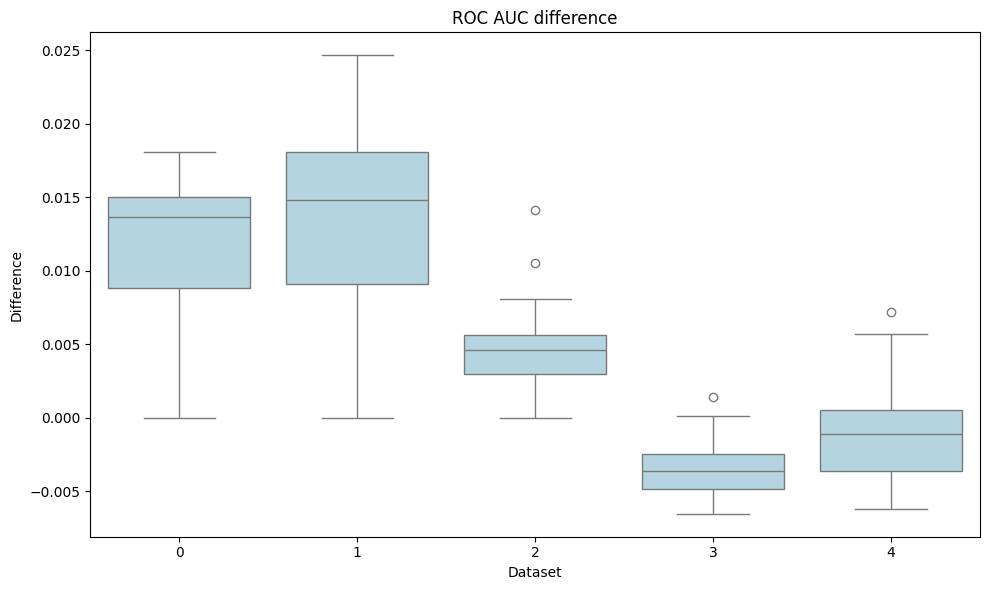

In [42]:
results_merged_rf = roc_auc_difference(param_cols_rf, results_rf, results_mean_rf)
plot_roc_auc_difference(results_merged_rf)

### XGBoost

In [43]:
results_list = []

model_pipeline.set_params(model=XGBClassifier())

for i, (Xi, yi) in enumerate(zip(X, y)):
    search = RandomizedSearchCV(
        model_pipeline,
        param_distributions=param_xgb,
        n_iter=30,
        scoring='roc_auc',
        cv=5,
        random_state=123,
        n_jobs=-1
    )

    search.fit(Xi, yi)

    df = pd.DataFrame(search.cv_results_)
    df['dataset'] = i
    results_list.append(df)

results_xgb = pd.concat(results_list, ignore_index=True)

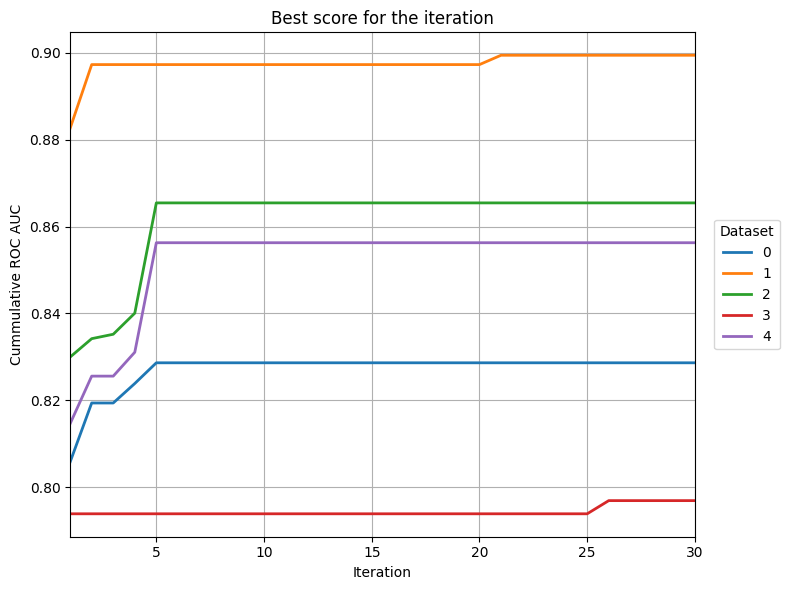

In [44]:
plot_iteration_scores(results_xgb)

In [79]:
param_cols_xgb = [c for c in results_xgb.columns if c.startswith('param_')]
results_mean_xgb = results_xgb.groupby(param_cols_xgb)['mean_test_score'].mean().reset_index().sort_values('mean_test_score', ascending=False).reset_index(drop=True)
results_mean_xgb.head()

,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,mean_test_score
0,0.142077,5,139,0.741097,0.848078
1,0.079390,4,919,0.734463,0.844406
2,0.038714,11,967,0.927151,0.842202
3,0.107245,14,1192,0.668613,0.835572
4,0.138359,14,1259,0.752010,0.834762


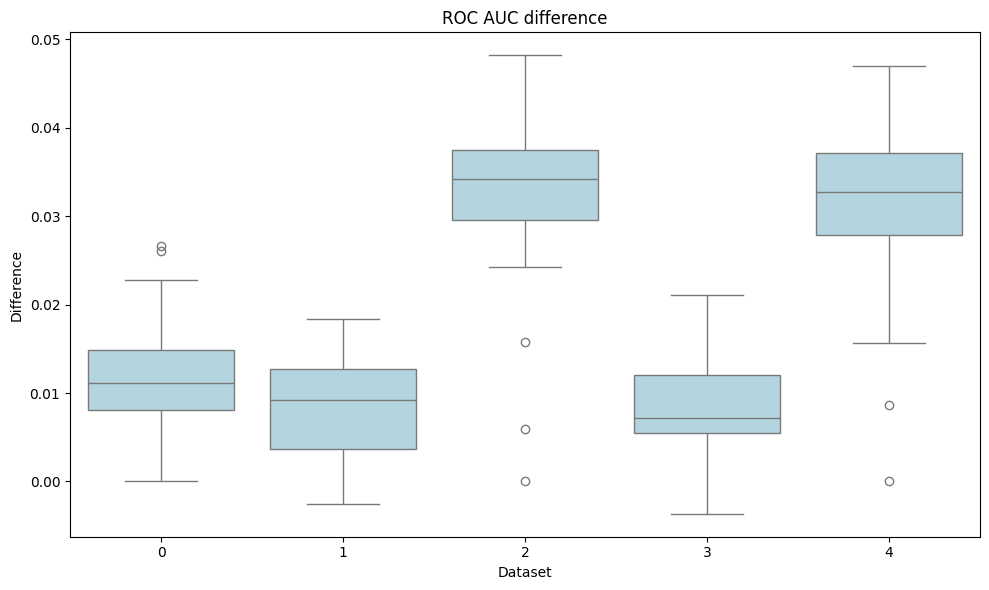

In [46]:
results_merged_xgb = roc_auc_difference(param_cols_xgb, results_xgb, results_mean_xgb)
plot_roc_auc_difference(results_merged_xgb)

### Comparison of ROC AUC tunability across models

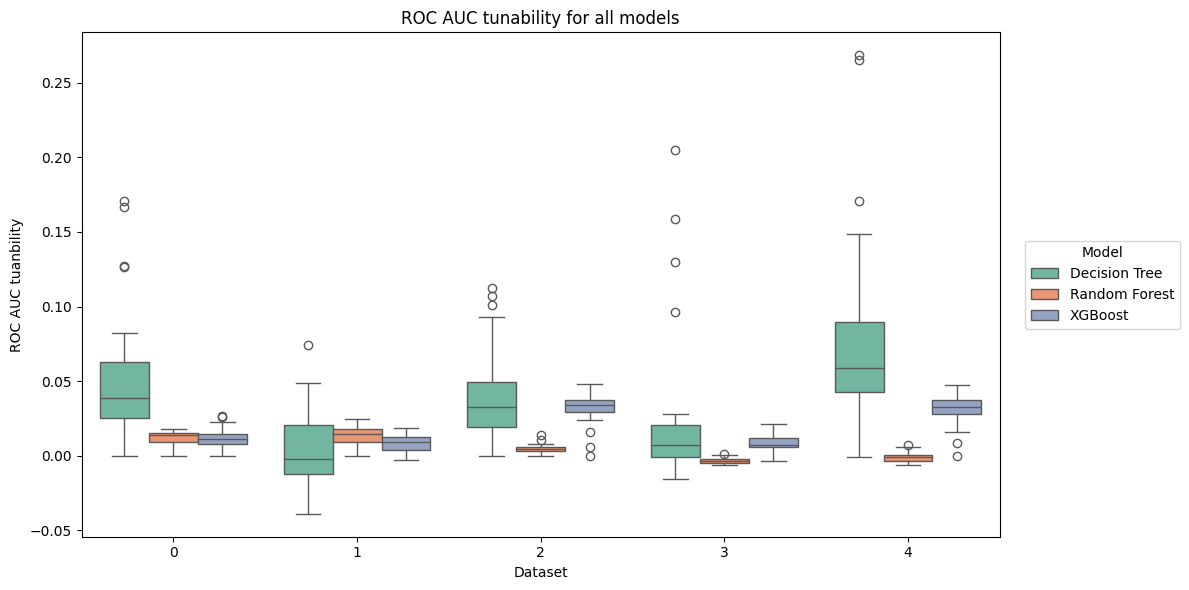

In [47]:
results_merged_dtc = roc_auc_difference(param_cols_dtc, results_dtc, results_mean_dtc)
results_merged_rf = roc_auc_difference(param_cols_rf, results_rf, results_mean_rf)
results_merged_xgb = roc_auc_difference(param_cols_xgb, results_xgb, results_mean_xgb)

results_merged_dtc['model'] = 'Decision Tree'
results_merged_rf['model'] = 'Random Forest'
results_merged_xgb['model'] = 'XGBoost'

results_all = pd.concat([results_merged_dtc, results_merged_rf, results_merged_xgb], ignore_index=True)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=results_all,
    x='dataset',
    y='score_diff',
    hue='model',
    palette='Set2'
)

plt.title('ROC AUC tunability for all models')
plt.xlabel('Dataset')
plt.ylabel('ROC AUC tuanbility')
plt.legend(title='Model', loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.tight_layout()
plt.show()

## Bayes Optimization

### Define hyperparameters for tuning

In [48]:
param_bayes_dtc = {
    "model__max_depth": Integer(1, 30),
    "model__min_samples_split": Integer(2, 20),
    "model__min_samples_leaf": Integer(1, 10),
    "model__max_features": Real(0.1, 0.9)
}

param_bayes_rf = {
    "model__n_estimators": Integer(100, 2000),
    "model__max_depth": Integer(5, 30),
    "model__min_samples_leaf": Integer(1, 10),
    "model__max_features": Real(0.1, 0.9)
}

param_bayes_xgb = {
    "model__n_estimators": Integer(100, 5000),
    "model__learning_rate": Real(0.01, 0.3),
    "model__max_depth": Integer(1, 15),
    "model__subsample": Real(0.1, 0.9)
}

In [49]:
def run_bayes_search(X, y, name, model, param_space):
    model_pipeline.set_params(model=model)
    
    opt = BayesSearchCV(
        model_pipeline,
        search_spaces=param_space,
        n_iter=30,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        random_state=42
    )
    
    opt.fit(X, y)

    res = opt.optimizer_results_[0]
    params = res.x_iters
    scores = res.func_vals
    param_names = [dim.name for dim in res.space.dimensions]
    
    df = pd.DataFrame(params, columns=param_names)
    df['mean_test_score'] = -scores
    df['dataset'] = name
    return df


### Decision Tree

In [50]:
results_all_dtc = []

for i, (Xi, yi) in enumerate(zip(X, y)):
    name = i
    df_result = run_bayes_search(Xi, yi, name, DecisionTreeClassifier(random_state=42), param_bayes_dtc)
    results_all_dtc.append(df_result)

results_bayes_dtc = pd.concat(results_all_dtc, ignore_index=True)

C:\Users\zuzan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(12), 0.9, np.int64(10), np.int64(20)] before, using random point [np.int64(12), 0.24928728600153466, np.int64(4), np.int64(16)]
  warnings.warn(


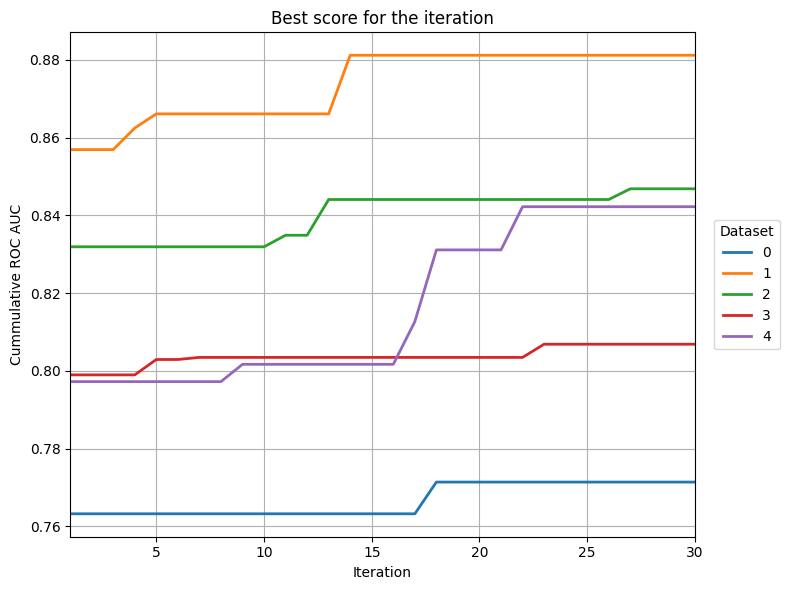

In [51]:
plot_iteration_scores(results_bayes_dtc)

### Random Forest

In [52]:
results_all_rf = []

for i, (Xi, yi) in enumerate(zip(X, y)):
    name = i
    df_result = run_bayes_search(Xi, yi, name, RandomForestClassifier(random_state=42), param_bayes_rf)
    results_all_rf.append(df_result)

results_bayes_rf = pd.concat(results_all_rf, ignore_index=True)

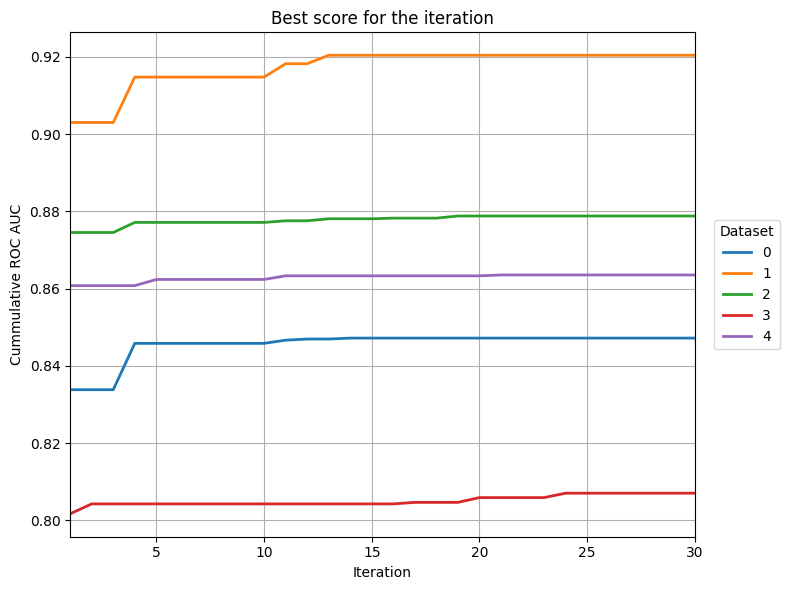

In [53]:
plot_iteration_scores(results_bayes_rf)

### XGBoost

In [54]:
results_all_xgb = []

for i, (Xi, yi) in enumerate(zip(X, y)):
    name = i
    df_result = run_bayes_search(Xi, yi, name, XGBClassifier(random_state=42), param_bayes_xgb)
    results_all_xgb.append(df_result)

results_bayes_xgb = pd.concat(results_all_xgb, ignore_index=True)

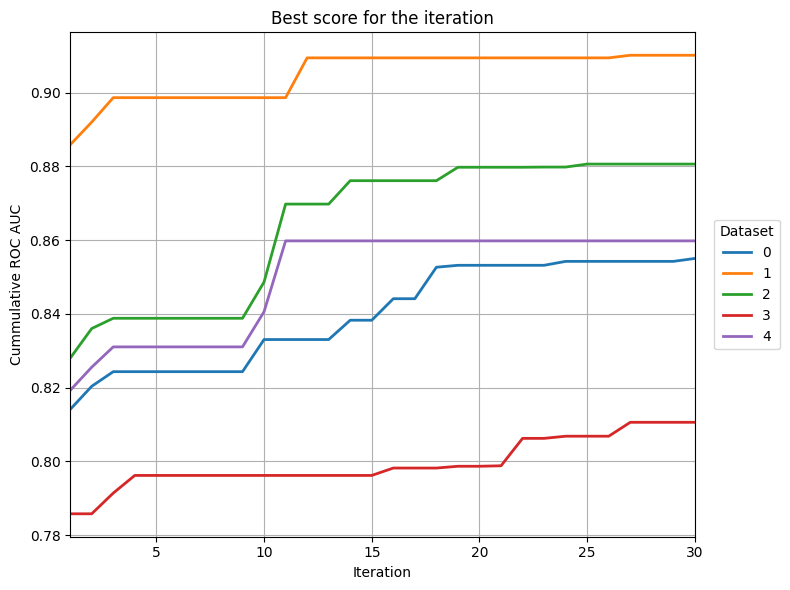

In [55]:
plot_iteration_scores(results_bayes_xgb)

## Best Params for RandomSearch

In [83]:
best_global_dtc = results_mean_dtc.iloc[0]
best_global_dtc_params = best_global_dtc[param_cols_dtc].to_dict()
best_global_dtc_score = best_global_dtc['mean_test_score']

best_global_rf = results_mean_rf.iloc[0]
best_global_rf_params = best_global_rf[param_cols_rf].to_dict()
best_global_rf_score = best_global_rf['mean_test_score']

best_global_xgb = results_mean_xgb.iloc[0]
best_global_xgb_params = best_global_xgb[param_cols_xgb].to_dict()
best_global_xgb_score = best_global_xgb['mean_test_score']


In [84]:
def print_global_best(model_name, best_params, best_score):
    print(f"{model_name}:")
    print("  Parameters:")
    for k, v in best_params.items():
        print(f"    {k}: {v}")
    print(f"  Mean Test Score: {best_score:.4f}\n")
print("Global Best Hyperparameters (Random Search)")
print_global_best("Decision Tree", best_global_dtc_params, best_global_dtc_score)
print_global_best("Random Forest", best_global_rf_params, best_global_rf_score)
print_global_best("XGBoost", best_global_xgb_params, best_global_xgb_score)

Global Best Hyperparameters (Random Search)
Decision Tree:
  Parameters:
    param_model__max_depth: 6.0
    param_model__max_features: 0.9933522634113976
    param_model__min_samples_leaf: 6.0
    param_model__min_samples_split: 19.0
  Mean Test Score: 0.8214

Random Forest:
  Parameters:
    param_model__max_depth: 12.0
    param_model__max_features: 0.19803605701573812
    param_model__min_samples_leaf: 6.0
    param_model__n_estimators: 795.0
  Mean Test Score: 0.8598

XGBoost:
  Parameters:
    param_model__learning_rate: 0.1420771534192229
    param_model__max_depth: 5.0
    param_model__n_estimators: 139.0
    param_model__subsample: 0.7410971632498862
  Mean Test Score: 0.8481



In [90]:
def best_params_per_dataset_random(results_df):
    param_cols = [c for c in results_df.columns if c.startswith('param_')]
    
    best_list = []
    for dataset_id in results_df['dataset'].unique():
        df_ds = results_df[results_df['dataset'] == dataset_id]
        best_row = df_ds.loc[df_ds['mean_test_score'].idxmax()]  
        best_params = best_row[param_cols].to_dict()
        best_params['dataset'] = dataset_id
        best_params['mean_test_score'] = best_row['mean_test_score']
        best_list.append(best_params)
    return pd.DataFrame(best_list)


best_per_dataset_dtc_rs = best_params_per_dataset_random(results_dtc)
best_per_dataset_rf_rs = best_params_per_dataset_random(results_rf)
best_per_dataset_xgb_rs = best_params_per_dataset_random(results_xgb)

In [91]:
def print_best_per_dataset(df, model_name):
    print(f"{model_name} – Best Hyperparameters per Dataset (Random Search)")
    for _, row in df.iterrows():
        print(f"Dataset {int(row['dataset'])}:")
        for c in df.columns:
            if c.startswith('param_'):
                print(f"  {c}: {row[c]}")
        print(f"  Mean Test Score: {row['mean_test_score']:.4f}\n")

print_best_per_dataset(best_per_dataset_dtc_rs, "Decision Tree")
print_best_per_dataset(best_per_dataset_rf_rs, "Random Forest")
print_best_per_dataset(best_per_dataset_xgb_rs, "XGBoost")

Decision Tree – Best Hyperparameters per Dataset (Random Search)
Dataset 0:
  param_model__max_depth: 6.0
  param_model__max_features: 0.8356014276655451
  param_model__min_samples_leaf: 3.0
  param_model__min_samples_split: 7.0
  Mean Test Score: 0.7716

Dataset 1:
  param_model__max_depth: 22.0
  param_model__max_features: 0.4084874503968776
  param_model__min_samples_leaf: 9.0
  param_model__min_samples_split: 19.0
  Mean Test Score: 0.8841

Dataset 2:
  param_model__max_depth: 6.0
  param_model__max_features: 0.9933522634113976
  param_model__min_samples_leaf: 6.0
  param_model__min_samples_split: 19.0
  Mean Test Score: 0.8592

Dataset 3:
  param_model__max_depth: 11.0
  param_model__max_features: 0.6695009727624485
  param_model__min_samples_leaf: 8.0
  param_model__min_samples_split: 16.0
  Mean Test Score: 0.8079

Dataset 4:
  param_model__max_depth: 6.0
  param_model__max_features: 0.9933522634113976
  param_model__min_samples_leaf: 6.0
  param_model__min_samples_split: 19.0
 

## Best Params for Bayes Optimization

In [114]:
def best_params_per_dataset_bayes(results_df):
    param_cols = [c for c in results_df.columns if c.startswith('model__')]
    
    best_list = []
    for dataset_id in results_df['dataset'].unique():
        df_ds = results_df[results_df['dataset'] == dataset_id]
        best_row = df_ds.loc[df_ds['mean_test_score'].idxmax()]  
        best_params = best_row[param_cols].to_dict()
        best_params['dataset'] = dataset_id
        best_params['mean_test_score'] = best_row['mean_test_score']
        best_list.append(best_params)
    return pd.DataFrame(best_list)


best_per_dataset_dtc_bayes = best_params_per_dataset_bayes(results_bayes_dtc)
best_per_dataset_rf_bayes = best_params_per_dataset_bayes(results_bayes_rf)
best_per_dataset_xgb_bayes = best_params_per_dataset_bayes(results_bayes_xgb)



In [ ]:
def print_best_per_dataset(df, model_name):
    print(f"{model_name} – Best Hyperparameters per Dataset (Bayes Search)")
    for _, row in df.iterrows():
        print(f"Dataset {int(row['dataset'])}:")
        for c in df.columns:
            if c.startswith('model__'):
                print(f"  {c}: {row[c]}")
        print(f"  Mean Test Score: {row['mean_test_score']:.4f}\n")

print_best_per_dataset(best_per_dataset_dtc_bayes, "Decision Tree")
print_best_per_dataset(best_per_dataset_rf_bayes, "Random Forest")
print_best_per_dataset(best_per_dataset_xgb_bayes, "XGBoost")


Decision Tree – Best Hyperparameters per Dataset (Bayes Search)
Dataset 0:
  model__max_depth: 4.0
  model__max_features: 0.8462659795712196
  model__min_samples_leaf: 10.0
  model__min_samples_split: 19.0
  Mean Test Score: 0.7714

Dataset 1:
  model__max_depth: 5.0
  model__max_features: 0.12583688347964408
  model__min_samples_leaf: 4.0
  model__min_samples_split: 9.0
  Mean Test Score: 0.8812

Dataset 2:
  model__max_depth: 9.0
  model__max_features: 0.1
  model__min_samples_leaf: 10.0
  model__min_samples_split: 2.0
  Mean Test Score: 0.8469

Dataset 3:
  model__max_depth: 12.0
  model__max_features: 0.9
  model__min_samples_leaf: 10.0
  model__min_samples_split: 20.0
  Mean Test Score: 0.8069

Dataset 4:
  model__max_depth: 7.0
  model__max_features: 0.8886413895097125
  model__min_samples_leaf: 10.0
  model__min_samples_split: 16.0
  Mean Test Score: 0.8422

Random Forest – Best Hyperparameters per Dataset (Bayes Search)
Dataset 0:
  model__max_depth: 14.0
  model__max_features:

## Measuring Tunability

In [ ]:
from IPython.display import display

pd.set_option('display.max_columns', None)    
pd.set_option('display.width', 1000)           

In [116]:
mask_global_dtc = (results_dtc[param_cols_dtc] == pd.Series(best_global_dtc_params)).all(axis=1)
global_dtc_per_dataset = results_dtc[mask_global_dtc][['dataset', 'mean_test_score']].copy()
global_dtc_per_dataset.rename(columns={'mean_test_score': 'mean_test_score_global_random'}, inplace=True)
global_dtc_per_dataset['model'] = 'Decision Tree'

mask_global_rf = (results_rf[param_cols_rf] == pd.Series(best_global_rf_params)).all(axis=1)
global_rf_per_dataset = results_rf[mask_global_rf][['dataset', 'mean_test_score']].copy()
global_rf_per_dataset.rename(columns={'mean_test_score': 'mean_test_score_global_random'}, inplace=True)
global_rf_per_dataset['model'] = 'Random Forest'

mask_global_xgb = (results_xgb[param_cols_xgb] == pd.Series(best_global_xgb_params)).all(axis=1)
global_xgb_per_dataset = results_xgb[mask_global_xgb][['dataset', 'mean_test_score']].copy()
global_xgb_per_dataset.rename(columns={'mean_test_score': 'mean_test_score_global_random'}, inplace=True)
global_xgb_per_dataset['model'] = 'XGBoost'

In [117]:
def score_difference_global_vs_bayes(df_random_global, df_bayes, model_name):
    df_bayes_model = df_bayes.copy()
    
    df_merged = df_random_global[['dataset', 'mean_test_score_global_random']].merge(
        df_bayes_model[['dataset', 'mean_test_score']], on='dataset'
    )
    
    df_merged.rename(columns={'mean_test_score': 'mean_test_score_bayes'}, inplace=True)
    df_merged['score_diff'] = df_merged['mean_test_score_bayes'] - df_merged['mean_test_score_global_random']
    df_merged['model'] = model_name
    return df_merged

diff_dtc = score_difference_global_vs_bayes(global_dtc_per_dataset, best_per_dataset_dtc_bayes, "Decision Tree")
diff_rf = score_difference_global_vs_bayes(global_rf_per_dataset, best_per_dataset_rf_bayes, "Random Forest")
diff_xgb = score_difference_global_vs_bayes(global_xgb_per_dataset, best_per_dataset_xgb_bayes, "XGBoost")

diff_all = pd.concat([diff_dtc, diff_rf, diff_xgb], ignore_index=True)
print(diff_all)

    dataset  mean_test_score_global_random  mean_test_score_bayes  score_diff          model
0         0                       0.769637               0.771393    0.001756  Decision Tree
1         1                       0.847963               0.881212    0.033248  Decision Tree
2         2                       0.859235               0.846854   -0.012381  Decision Tree
3         3                       0.790584               0.806862    0.016277  Decision Tree
4         4                       0.839761               0.842245    0.002484  Decision Tree
5         0                       0.845841               0.847217    0.001376  Random Forest
6         1                       0.917346               0.920442    0.003096  Random Forest
7         2                       0.878559               0.878827    0.000268  Random Forest
8         3                       0.798765               0.807068    0.008302  Random Forest
9         4                       0.858690               0.863565    0

In [100]:
def score_difference(df_random, df_bayes, model_name):
    df_merged = df_random[['dataset', 'mean_test_score']].merge(
        df_bayes[['dataset', 'mean_test_score']], on='dataset', suffixes=('_random', '_bayes')
    )
    df_merged['score_diff'] = df_merged['mean_test_score_bayes'] - df_merged['mean_test_score_random']
    df_merged['model'] = model_name
    return df_merged

diff_dtc = score_difference(best_per_dataset_dtc_rs, best_per_dataset_dtc_bayes, "Decision Tree")
diff_rf = score_difference(best_per_dataset_rf_rs, best_per_dataset_rf_bayes, "Random Forest")
diff_xgb = score_difference(best_per_dataset_xgb_rs, best_per_dataset_xgb_bayes, "XGBoost")

diff_all = pd.concat([diff_dtc, diff_rf, diff_xgb], ignore_index=True)
print(diff_all)


    dataset  mean_test_score_random  mean_test_score_bayes  score_diff          model
0         0                0.771620               0.771393   -0.000227  Decision Tree
1         1                0.884106               0.881212   -0.002895  Decision Tree
2         2                0.859235               0.846854   -0.012381  Decision Tree
3         3                0.807944               0.806862   -0.001082  Decision Tree
4         4                0.839761               0.842245    0.002484  Decision Tree
5         0                0.845841               0.847217    0.001376  Random Forest
6         1                0.917346               0.920442    0.003096  Random Forest
7         2                0.878559               0.878827    0.000268  Random Forest
8         3                0.805296               0.807068    0.001772  Random Forest
9         4                0.864917               0.863565   -0.001353  Random Forest
10        0                0.828629               0.85

In [120]:
default_cv_results = []

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=123),
    "Random Forest": RandomForestClassifier(random_state=123),
    "XGBoost": XGBClassifier(random_state=123, use_label_encoder=False, eval_metric='logloss')
}

for model_name, model in models.items():
    model_pipeline.set_params(model=model)  
    for i, (Xi, yi) in enumerate(zip(X, y)):
        scores = cross_val_score(
            model_pipeline,
            Xi,
            yi,
            cv=5,
            scoring='roc_auc',
            n_jobs=-1
        )
        
        default_cv_results.append({
            "dataset": i,
            "mean_test_score_default": scores.mean(),
            "model": model_name,
        })

df_default_cv_results = pd.DataFrame(default_cv_results)
print(df_default_cv_results)

    dataset  mean_test_score_default          model
0         0                 0.664053  Decision Tree
1         1                 0.752167  Decision Tree
2         2                 0.704008  Decision Tree
3         3                 0.749201  Decision Tree
4         4                 0.691130  Decision Tree
5         0                 0.831992  Random Forest
6         1                 0.906482  Random Forest
7         2                 0.866016  Random Forest
8         3                 0.794197  Random Forest
9         4                 0.851572  Random Forest
10        0                 0.823611        XGBoost
11        1                 0.896373        XGBoost
12        2                 0.856331        XGBoost
13        3                 0.795016        XGBoost
14        4                 0.843931        XGBoost


In [ ]:

def combine_all_scores(df_default, df_global, df_best_random, df_bayes, model_name):
    df = df_default[df_default['model'] == model_name][['dataset', 'mean_test_score_default']].copy()
    df = df.merge(df_global[['dataset', 'mean_test_score_global_random']], on='dataset')
    df = df.merge(df_best_random[['dataset', 'mean_test_score']], on='dataset')
    df.rename(columns={'mean_test_score': 'mean_test_score_random'}, inplace=True)
    df = df.merge(df_bayes[['dataset', 'mean_test_score']], on='dataset')
    df.rename(columns={'mean_test_score': 'mean_test_score_bayes'}, inplace=True)

    df['diff_default_vs_global'] = df['mean_test_score_global_random'] - df['mean_test_score_default']
    df['diff_default_vs_random'] = df['mean_test_score_random'] - df['mean_test_score_default']
    df['diff_default_vs_bayes'] = df['mean_test_score_bayes'] - df['mean_test_score_default']

    df['model'] = model_name
    return df

df_dtc = combine_all_scores(df_default_cv_results, global_dtc_per_dataset,
                            best_per_dataset_dtc_rs, best_per_dataset_dtc_bayes, "Decision Tree")
df_rf = combine_all_scores(df_default_cv_results, global_rf_per_dataset,
                           best_per_dataset_rf_rs, best_per_dataset_rf_bayes, "Random Forest")
df_xgb = combine_all_scores(df_default_cv_results, global_xgb_per_dataset,
                            best_per_dataset_xgb_rs, best_per_dataset_xgb_bayes, "XGBoost")

df_all_models = pd.concat([df_dtc, df_rf, df_xgb], ignore_index=True)

print(df_all_models)


    dataset  mean_test_score_default  mean_test_score_global_random  mean_test_score_random  mean_test_score_bayes  diff_default_vs_global  diff_default_vs_random  diff_default_vs_bayes          model
0         0                 0.664053                       0.769637                0.771620               0.771393                0.105584                0.107567               0.107340  Decision Tree
1         1                 0.752167                       0.847963                0.884106               0.881212                0.095796                0.131939               0.129044  Decision Tree
2         2                 0.704008                       0.859235                0.859235               0.846854                0.155227                0.155227               0.142846  Decision Tree
3         3                 0.749201                       0.790584                0.807944               0.806862                0.041383                0.058742               0.057660  Decision 